Build the Image classification model by dividing the model into following 4 stages: a. Loading and preprocessing the image data b. Defining the model’s architecture c. Training the model d. Estimating the model’s performance

In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from sklearn.metrics import accuracy_score

In [3]:
mnist=tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

Shape of training:  (60000, 28, 28)


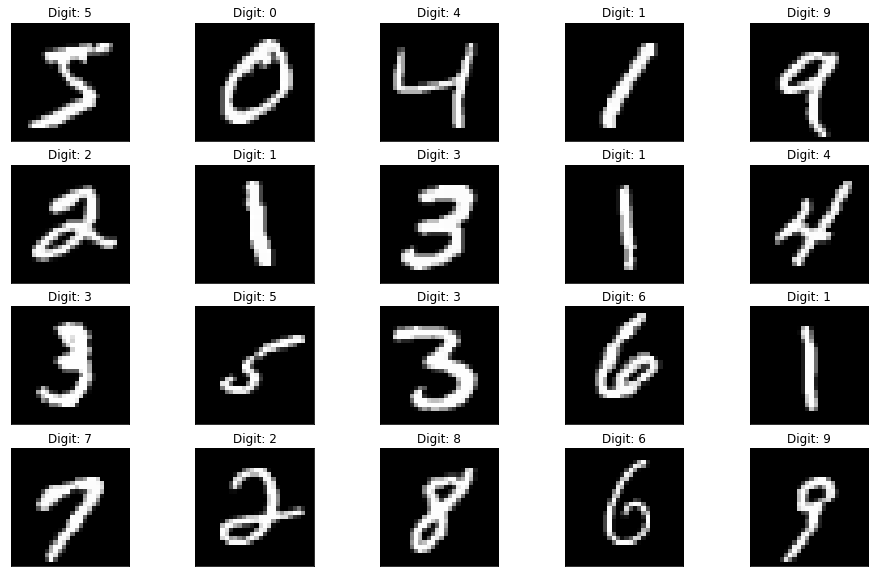

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [5]:
x_train=x_train/255
x_test=x_test/255
print("Shape of training: ",x_train.shape)

def plot_digit(image,digit,plt,i):
    plt.subplot(4,5,i+1)
    plt.imshow(image,cmap='gray')
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])
plt.figure(figsize=(16,10))
    
for i in range(20):
    plot_digit(x_train[i],y_train[i],plt,i)
plt.show()
x_train = x_train.reshape((x_train.shape + (1,)))
x_test = x_test.reshape((x_test.shape + (1,)))
y_train[0:20]

In [6]:
model = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),        #28x28pixel grayscale images(one channel)
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100,activation="relu"),
    Dense(10,activation="softmax")
])

# Conv2D: 32 filters each of size 3x3, to extract features from the input.
# Max-pooling reduces the spatial dimensions of the feature maps and helps in capturing important features.
# flatten the 2D feature maps obtained from the convolutional layers into a 1D vector.

In [7]:
model.compile(
    optimizer='adam',   #Adaptive Moment Estimation
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)
model.summary()
model.fit(x_train, y_train, epochs=10, batch_size=32)

#The training dataset is typically divided into batches to speed up the training process. 
# Each batch contains a subset of the training data. 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

313/313 [==============================] - 1s 3ms/step - loss: 0.0579 - accuracy: 0.9863
Loss0.058
Accuracy0.986


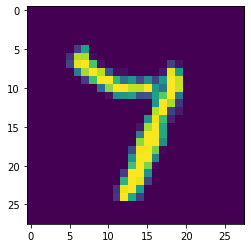

In [8]:
test_loss , test_acc = model.evaluate(x_test,y_test)
print("Loss%.3f" %test_loss)
print("Accuracy%.3f" %test_acc)
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [9]:
predictions = np.argmax(model.predict(x_test), axis=-1)
accuracy_score(y_test, predictions)
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))
#The np.argmax function from the NumPy library is used to find the index of the maximum probability for each prediction.
#axis=-1 argument means that the argmax operation is performed along the last axis, which corresponds to the class dimension.

313/313 [==============================] - 1s 2ms/step
Handwritten number in the image is= 7
